In [1]:
import pandas as pd
import pandera as pa

In [2]:
df = pd.read_csv("campoes_brasileiro.csv")
df

,Ano,Vencedor,Vice,Terceiro colocado,Quarto colocado,Artilheiro(s),Gols
0,1959,Bahia,Santos,Grêmio,Vasco da Gama,Léo Briglia (Bahia),8
1,1960,Palmeiras,Fortaleza,Fluminense,Santa Cruz,Bececê (Fortaleza),7
2,1961,Santos,Bahia,America,Náutico,Pelé (Santos),7
3,1962,Santos,Botafogo,Internacional,Sport,Coutinho (Santos),7
4,1963,Santos,Bahia,Grêmio,Botafogo,Pelé (Santos),8
...,...,...,...,...,...,...,...
58,2015,Corinthians,Atlético Mineiro,Grêmio,São Paulo,Ricardo Oliveira (Santos),20
59,2016,Palmeiras,Santos,Flamengo,Atlético Mineiro,William Pottker (Ponte Preta) Diego Souza (Sp...,14
60,2017,Corinthians,Palmeiras,Santos,Grêmio,Henrique Dourado (Fluminense) Jô (Corinthians),18
61,2018,Palmeiras,Flamengo,Internacional,Grêmio,Gabriel (Santos),18


In [3]:
df = df.rename(columns={"Terceiro colocado": "Terceiro_Colocado", "Quarto colocado": "Quarto_Colocado",
                   "Artilheiro(s)": "Artilheiro"})

In [4]:
schema = pa.DataFrameSchema(
    columns = {
        "Ano": pa.Column(pa.Int),
        "Vencedor": pa.Column(pa.String),
        "Vice": pa.Column(pa.String),
        "Terceiro_Colocado": pa.Column(pa.String),
        "Quarto_Colocado": pa.Column(pa.String),
        "Artilheiro": pa.Column(pa.String),
        "Gols": pa.Column(pa.Int)
    }
)

In [5]:
schema.validate(df)

,Ano,Vencedor,Vice,Terceiro_Colocado,Quarto_Colocado,Artilheiro,Gols
0,1959,Bahia,Santos,Grêmio,Vasco da Gama,Léo Briglia (Bahia),8
1,1960,Palmeiras,Fortaleza,Fluminense,Santa Cruz,Bececê (Fortaleza),7
2,1961,Santos,Bahia,America,Náutico,Pelé (Santos),7
3,1962,Santos,Botafogo,Internacional,Sport,Coutinho (Santos),7
4,1963,Santos,Bahia,Grêmio,Botafogo,Pelé (Santos),8
...,...,...,...,...,...,...,...
58,2015,Corinthians,Atlético Mineiro,Grêmio,São Paulo,Ricardo Oliveira (Santos),20
59,2016,Palmeiras,Santos,Flamengo,Atlético Mineiro,William Pottker (Ponte Preta) Diego Souza (Sp...,14
60,2017,Corinthians,Palmeiras,Santos,Grêmio,Henrique Dourado (Fluminense) Jô (Corinthians),18
61,2018,Palmeiras,Flamengo,Internacional,Grêmio,Gabriel (Santos),18


In [6]:
df.set_index('Ano', inplace=True)

In [7]:
#Verificando se não há informações duplicadas no Index(Ano)
df.drop_duplicates(inplace=True)

In [8]:
#Fazendo um count das linhas para validar se não há valores nulos
df.count()

Vencedor             63
Vice                 63
Terceiro_Colocado    63
Quarto_Colocado      63
Artilheiro           63
Gols                 63
dtype: int64

In [9]:
#Exibindo os ultimos 5 campeões brasileiros
df.loc[[2015, 2016, 2017, 2018, 2019], 'Vencedor']

Ano
2015    Corinthians
2016      Palmeiras
2017    Corinthians
2018      Palmeiras
2019       Flamengo
Name: Vencedor, dtype: object

In [10]:
#Artilheiros que marcaram mais de 20 gols em um ano
filtro = df.Gols > 20
df.loc[filtro, 'Artilheiro']

Ano
1973                                   Ramón (Santa Cruz)
1977                          Reinaldo (Atlético Mineiro)
1980                                      Zico (Flamengo)
1982                                      Zico (Flamengo)
1983                            Serginho Chulapa (Santos)
1986                                   Careca (São Paulo)
1997                              Edmundo (Vasco da Gama)
1998                                       Viola (Santos)
1999                         Guilherme (Atlético Mineiro)
2000                                Adhemar (São Caetano)
2001                              Romário (Vasco da Gama)
2003                                        Dimba (Goiás)
2004                     Washington (Atlético Paranaense)
2005                              Romário (Vasco da Gama)
2008    Keirrison (Coritiba) Kléber Pereira (Santos) W...
2010                                       Jonas (Grêmio)
2011                                      Borges (Santos)
2013      

In [22]:
#Time que ganhou mais títulos brasileiros em lista
df.groupby(['Vencedor']).size().sort_values(ascending=False)

Vencedor
Palmeiras        10
Santos            8
Corinthians       7
Flamengo          6
São               6
Cruzeiro          4
Fluminense        4
Vasco             4
Internacional     3
Atlético          2
Bahia             2
Botafogo          2
Grêmio            2
Coritiba          1
Guarani           1
Sport             1
dtype: int64

Text(0, 0.5, 'Quantidade de Títulos')

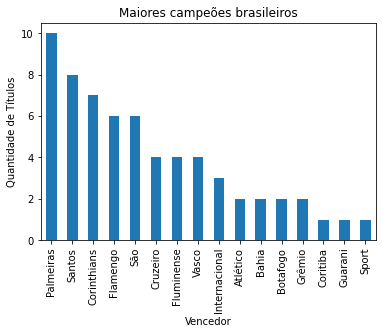

In [25]:
#Time que ganhou mais títulos brasileiros em gráfico
import matplotlib.pyplot as plt
df.groupby(['Vencedor']).size().sort_values(ascending=False).plot.bar(title="Maiores campeões brasileiros")
plt.xlabel("Vencedor")
plt.ylabel("Quantidade de Títulos")

In [12]:
#Atleta que por mais vezes foi artilheiro no campeonato
df.groupby(['Artilheiro']).size().sort_values(ascending=False)

Artilheiro
Pelé (Santos)                                                                   3
Zico (Flamengo)                                                                 2
Fred (Fluminense)                                                               2
Romário (Vasco da Gama)                                                         2
Roberto Dinamite (Vasco da Gama)                                                2
Ademar Pantera (Flamengo) César Maluco (Palmeiras)                              1
Ramón (Santa Cruz)                                                              1
Keirrison (Coritiba) Kléber Pereira (Santos) Washington (Fluminense)            1
Luís Fabiano (São Paulo) Rodrigo Fabri (Grêmio)                                 1
Léo Briglia (Bahia)                                                             1
Müller (São Paulo)                                                              1
Nunes (Flamengo)                                                                1
Nílso

In [13]:
#Anos em que times paulistas foram campeões brasileiros
filtro = df.Vencedor.isin(['São', 'Santos', 'Palmeiras', 'Corinthians'])
df.loc[filtro, ['Vencedor']]

,Vencedor
Ano,
1960,Palmeiras
1961,Santos
1962,Santos
1963,Santos
1964,Santos
1965,Santos
1967,Palmeiras
1967,Palmeiras
1968,Santos


In [20]:
#Ranking de artilheiros que mais marcaram gols em um único ano
df.groupby(['Artilheiro']).Gols.max().sort_values(ascending=False)

Artilheiro
Washington (Atlético Paranaense)                                                34
Dimba (Goiás)                                                                   31
Edmundo (Vasco da Gama)                                                         29
Reinaldo (Atlético Mineiro)                                                     28
Guilherme (Atlético Mineiro)                                                    28
Gabriel (Flamengo)                                                              25
Careca (São Paulo)                                                              25
Jonas (Grêmio)                                                                  23
Borges (Santos)                                                                 23
Romário (Vasco da Gama)                                                         22
Adhemar (São Caetano)                                                           22
Serginho Chulapa (Santos)                                                   

In [26]:
#Quantidade total de gols marcados
df.Gols.sum()

1087

In [28]:
#Análise exploratória sobre os dados de gols
df.Gols.describe()

count    63.000000
mean     17.253968
std       6.177400
min       7.000000
25%      13.500000
50%      18.000000
75%      21.000000
max      34.000000
Name: Gols, dtype: float64